In [1]:
import numpy
import random
import matplotlib.pyplot as plt

/home/aburke98/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from datetime import datetime, timedelta
now = datetime.now().replace(second=0, microsecond=0)

In [3]:
DESIGN_MIN_VOLTAGE = 2.7
DESIGN_MAX_VOLTAGE = 4.2

In [4]:
LOW_DISCHARGE_CURRENT = -0.2

In [5]:
with open("data.csv", "w") as f:
    f.write("#timestamp, current, voltage, soc\n")

    current = LOW_DISCHARGE_CURRENT
    voltage = DESIGN_MAX_VOLTAGE
    minutes_passed = 0
    while voltage > DESIGN_MIN_VOLTAGE:
        f.write(f"""\
{now+timedelta(minutes=minutes_passed)}, \
{current+numpy.round(random.gauss(0,0.0001), decimals=4):.4f}, \
{voltage:.3f}, \
{int((voltage-DESIGN_MIN_VOLTAGE)/(DESIGN_MAX_VOLTAGE-DESIGN_MIN_VOLTAGE)*100)}\n""")

        voltage -= random.uniform(0, 0.006 * minutes_passed/100)

        minutes_passed += 1

In [6]:
timestamps = []
currents = []
voltages = []
socs = []
with open("data.csv", "r") as f:
    for l in f:
        if l[0] == "#": continue

        timestamp, current, voltage, soc = l.strip().split(",")
        timestamps.append(datetime.fromisoformat(timestamp))
        currents.append(float(current))
        voltages.append(float(voltage))
        socs.append(int(soc))

In [ ]:
times = []
for timestamp in timestamps:
    times.append((timestamp - timestamps[0]).total_seconds())

AttributeError: 'datetime.timedelta' object has no attribute 'total_hours'

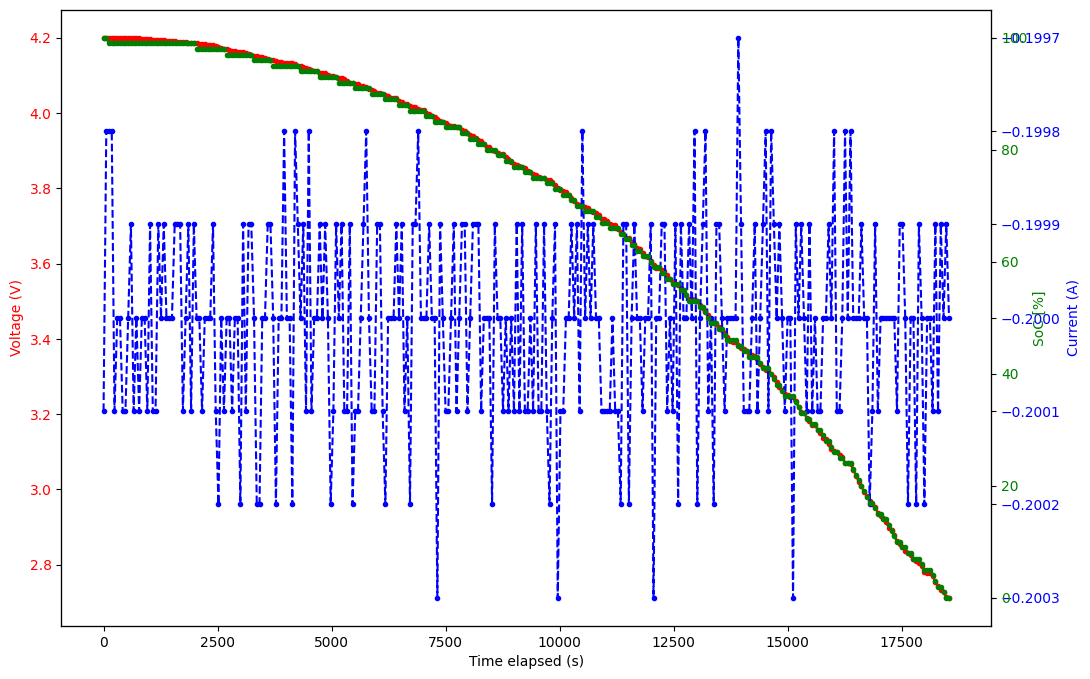

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(times, voltages, color="r", marker=".", label="Voltage")
ax1.set_xlabel("Time elapsed (s)")
ax1.set_ylabel("Voltage (V)", color="r")
ax1.tick_params(axis="y", labelcolor="r")

ax2 = ax1.twinx()
ax2.plot( times, currents, color="b", marker=".", linestyle="--", label="Current")
ax2.set_ylabel("Current (A)", color="b")
ax2.tick_params(axis="y", labelcolor="b")

ax3 = ax1.twinx()
ax3.plot( times, socs, color="g", marker=".", linestyle=":", label="SoC")
ax3.set_ylabel("SoC [%]", color="g")
ax3.tick_params(axis="y", labelcolor="g")